# KMeans Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# Dog Horse KMeans Challenge

In [2]:
# Import Data
df_dh = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv")
# We picked variables that we need
X = df_dh[['height', 'weight']]
df_dh.head()

,height,weight,target,type
0,27.0,71.0,0.0,dog
1,27.0,92.0,0.0,dog
2,32.0,47.0,0.0,dog
3,30.0,90.0,0.0,dog
4,28.0,91.0,0.0,dog


In [3]:
# Scale Data
scale = StandardScaler()
# Fit & transform data.
Scaled_df = scale.fit_transform(X)

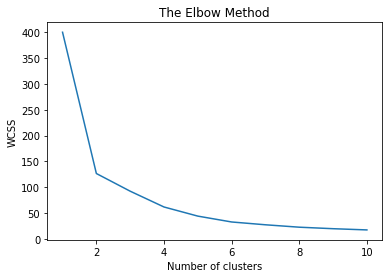

In [4]:
# Create Elbow Plot

# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(Scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()




In [56]:
# Apply KMeans and Plot KMeans Results and Actual Results
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(Scaled_df)


In [57]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0], dtype=int32)

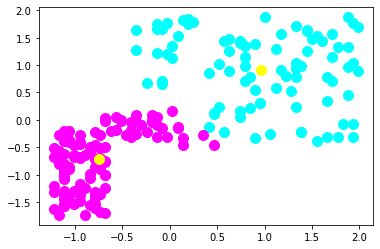

In [58]:
plt.scatter(Scaled_df[y_kmeans == 0, 0], Scaled_df[y_kmeans == 0, 1], s = 100, c = 'b', label = 'Cluster 1')

plt.scatter(Scaled_df[y_kmeans == 1, 0], Scaled_df[y_kmeans == 1, 1], s = 100, c = 'magenta', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label = 'Centroids')


In [8]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0]


In [9]:
# Cluster centeriods
print (kmeans.cluster_centers_)

[[ 0.96628215  0.91732732]
 [-0.74395174 -0.70626086]]


In [10]:
# assign the y_kmeans to a new column in the dataset
df_dh['kmean_prid']= y_kmeans
df_dh

,height,weight,target,type,kmean_prid
0,27.0,71.0,0.0,dog,1
1,27.0,92.0,0.0,dog,1
2,32.0,47.0,0.0,dog,1
3,30.0,90.0,0.0,dog,1
4,28.0,91.0,0.0,dog,1
...,...,...,...,...,...
195,55.0,140.0,1.0,horse,0
196,82.0,179.0,1.0,horse,0
197,46.0,132.0,1.0,horse,0
198,56.0,89.0,1.0,horse,1


In [11]:
# replace dog with 1 and horse with 0 to help us caluclate the Accuracy Score
df_dh['type'] = df_dh['type'].replace(['dog'], '0')
df_dh['type'] =df_dh['type'].replace(['horse'], '1')

In [12]:
df_dh.type=df_dh.type.astype(int)

In [13]:
# Calculate the number of correct predictions
(df_dh['type'] == df_dh['kmean_prid']).value_counts()

False    187
True      13
dtype: int64

In [14]:
predicted_labels = kmeans.labels_

In [15]:
label=df_dh['type']

In [16]:
kmeans.cluster_centers_

array([[ 0.96628215,  0.91732732],
       [-0.74395174, -0.70626086]])

In [17]:
# Compute Accuracy Score of KMean Labels with True Labels
cm = confusion_matrix(label, predicted_labels)

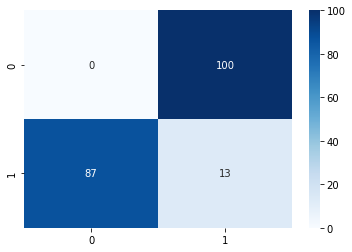

In [18]:
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [19]:
accuracy_score(label, predicted_labels)

0.065

# Seattle Weather KMeans Challenge

In [20]:
df_sea = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/seattle_weather_1948-2017.csv")
X_sea = df_sea[['tmax', 'tmin']]
df_sea.head()

,ds,prcp,tmax,tmin,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [21]:
# Scale Data
scale = StandardScaler()
# Fit & transform data.
Scaled_df_sea = scale.fit_transform(X_sea)

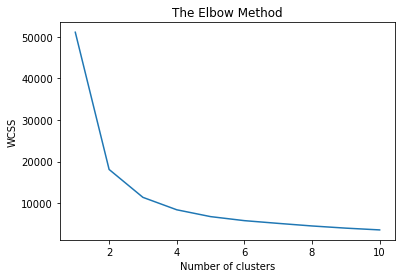

In [22]:
# Create Elbow Plot

# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(Scaled_df_sea)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# From the plot we can see that the optimal number of clusters in 4, but our target is 2 so we should pick 2.

In [50]:
# Apply KMeans and Plot KMeans Results and Actual Results
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(Scaled_df_sea)

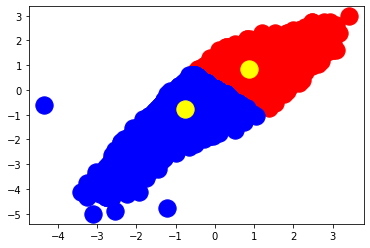

In [51]:
plt.scatter(Scaled_df_sea[y_kmeans == 0, 0], Scaled_df_sea[y_kmeans == 0, 1], s = 300, c = 'red', label = 'Cluster 1')
plt.scatter(Scaled_df_sea[y_kmeans == 1, 0], Scaled_df_sea[y_kmeans == 1, 1], s = 300, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')


In [25]:
y_kmeans

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [26]:
# assign the y_kmeans to a new column
df_sea['kmean_prid']= y_kmeans
df_sea

,ds,prcp,tmax,tmin,rain,kmean_prid
0,1948-01-01,0.47,51,42,True,1
1,1948-01-02,0.59,45,36,True,1
2,1948-01-03,0.42,45,35,True,1
3,1948-01-04,0.31,45,34,True,1
4,1948-01-05,0.17,45,32,True,1
...,...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False,1
25547,2017-12-11,0.00,49,29,False,1
25548,2017-12-12,0.00,46,32,False,1
25549,2017-12-13,0.00,48,34,False,1


In [27]:
# replace True with 1 and False with 0 to help us caluclate the Accuracy Score
df_sea['rain'] = df_sea['rain'].replace(['False'], 0)
df_sea['rain'] =df_sea['rain'].replace(['True'], 1)

In [28]:
df_sea.kmean_prid.value_counts()


1    13616
0    11935
Name: kmean_prid, dtype: int64

In [29]:
df_sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ds          25551 non-null  object 
 1   prcp        25548 non-null  float64
 2   tmax        25551 non-null  int64  
 3   tmin        25551 non-null  int64  
 4   rain        25548 non-null  object 
 5   kmean_prid  25551 non-null  int32  
dtypes: float64(1), int32(1), int64(2), object(2)
memory usage: 1.1+ MB


In [30]:
df_sea.dropna(inplace=True)

In [31]:
df_sea.rain=df_sea.rain.astype(int)

In [32]:
# Calculate the number of correct predictions
(df_sea['rain'] == df_sea['kmean_prid']).value_counts()

True     16266
False     9282
dtype: int64

In [33]:
# Compute Accuracy Score of KMean Labels with True Labels
accuracy_score(df_sea['rain'], df_sea['kmean_prid'])

0.6366838891498356

In [34]:
ccm=confusion_matrix(df_sea['rain'], df_sea['kmean_prid'])

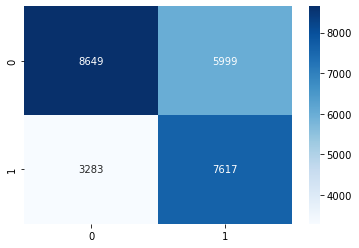

In [35]:
ax = sns.heatmap(ccm, annot=True, fmt="d", cmap="Blues")

# Random Blob KMeans Challenge

- You dont have true labels for this data so this is truly an unsupervised dataset
- The blobs are randomly generated every time you run the cell and their characteristics are:
    - 2000-4000 data points
    - 10-30 blobs created

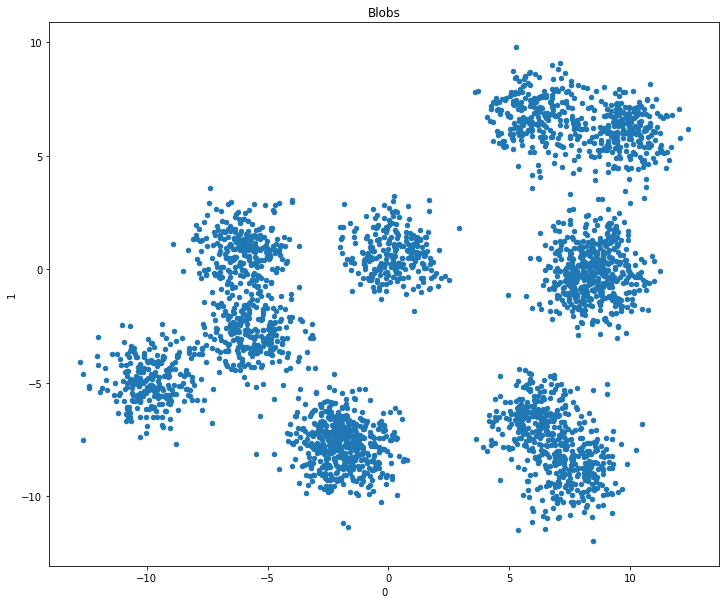

In [36]:
df_blob = pd.DataFrame(make_blobs(random.randint(2000,4000), centers=random.randint(10,30))[0])
df_blob.plot(kind="scatter", x=0, y=1, title="Blobs", figsize=(12,10));

In [37]:
# Scale Data
scale = StandardScaler()
# Fit & transform data.
Scaled_df_blob = scale.fit_transform(df_blob)


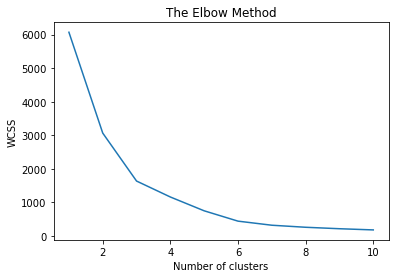

In [38]:
# Create Elbow Plot

# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(Scaled_df_blob)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [39]:
# Apply KMeans and Plot KMeans Results and Actual Results
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(Scaled_df_blob)

In [40]:
y_kmeans

array([0, 0, 0, ..., 0, 1, 1], dtype=int32)

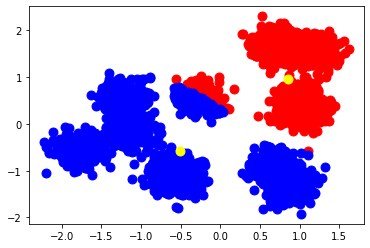

In [45]:
# Plot the clusters 
plt.scatter(Scaled_df_blob[y_kmeans == 0, 0], Scaled_df_blob[y_kmeans == 0, 1], s = 80, c = 'red', label = 'Cluster 1')

plt.scatter(Scaled_df_blob[y_kmeans == 1, 0], Scaled_df_blob[y_kmeans == 1, 1], s = 80, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=80, c='yellow', label = 'Centroids')
